In [1]:
# This file 'digit_model' is how we are going to generate our model to predict what numbers were fed in. 
# The next file 'image_process' will discern what is fed into this model.
# import the necessary modules
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Tensorflow has a 70,000 digit MNIST dataset pre-built and cleaned available. 
# Load the data set and split as test/train 1:6 by default. 
# The images are already threshold cleaned, and 28x28 pixels
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [4]:
# Normalize the images along the row axis
train_images = tf.keras.utils.normalize(train_images, axis=1) 
test_images = tf.keras.utils.normalize(test_images, axis=1) 
print(test_images.shape)
print(train_images.shape)

(10000, 28, 28)
(60000, 28, 28)


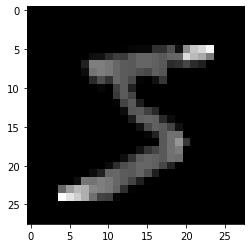

Image Label: 5


In [5]:
# Plot the first train image for reference
plt.imshow(train_images[0], cmap="gray") 
plt.show() 
print(f'Image Label: {train_labels[0]}')

In [16]:
# Now lets build a neural network and train it to the data. 

# A simple sequential model will do the trick since we are just using this for digit identification.
# Using a Conv2D layer would likely improve our performance for image processing, but this scenario is not too demanding.  
model = tf.keras.models.Sequential()

# Lets flatten out the input image into a 1D array first
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Now we can add some fully conected hidden layers. 
# I arbitrarely chose 128 nodes for the two hidden layers based on similar examples. 
# You could probably get away with a better structure if in-depth optimization was needed. 
# The important thing is that our final layers has an output of 10 for the unique digits. 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_34 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_35 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Now lets train the model. 
# Using categorical cross-entropy for our loss function, and going with "adam" to get an adaptive gradient descent optimzation.
# Going with 5 epochs arbitarily as the performance turns out adequate.
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x=train_images, y=train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 897us/step - loss: 0.2577 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 2s 882us/step - loss: 0.1032 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 2s 872us/step - loss: 0.0705 - accuracy: 0.9775
Epoch 4/5
1875/1875 [==============================] - 2s 885us/step - loss: 0.0522 - accuracy: 0.9834
Epoch 5/5
1875/1875 [==============================] - 2s 884us/step - loss: 0.0388 - accuracy: 0.9867


In [19]:
# Now lets feed the test images into the trained model and check our performance. 
# If we really wanted to peel back the performance we sould be including multiple metrics for comparison. 
# Another multi-class metric we could run is macro/micro F1-score. This would give us a hybrid between precision and recall.
test_loss, test_accuracy = model.evaluate(x=test_images, y=test_labels)
print(f'Model Accuracy: {test_accuracy}')

313/313 [==============================] - 0s 596us/step - loss: 0.0928 - accuracy: 0.9729
Model Accuracy: 0.9728999733924866


In [20]:
# We can get the model's best prediction for each test image by choosing the highest output from that softmax output layer.
predictions = model.predict([test_images]) 
pred_val = [np.argmax(x) for x in predictions]

Test precision: 7


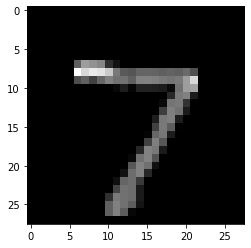

In [21]:
# Just as a sanity check, here is a predicted output example.
print(f'Test precision: {pred_val[0]}') # Print out the number
plt.imshow(test_images[0], cmap="gray") # Import the image
plt.show() # Show the image

In [22]:
# Great, everything is working. Now we can save the model and use it for our images. 
model.save('digit_model')

INFO:tensorflow:Assets written to: digit_model\assets
